In [1]:
import pandas as pd
fare_df = pd.read_csv('../NY_fare.csv')
fare_df.shape

(50000, 8)

In [2]:
fare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [3]:
fare_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [4]:
fare_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,31:49.0,8.6,2009-01-01 01:31:49 UTC,-73.994192,40.720077,-73.993356,40.742642,1
1,05:37.0,11.0,2009-01-01 02:05:37 UTC,-73.978433,40.744781,-74.004713,40.734328,1
2,07:49.0,17.8,2009-01-01 02:07:49 UTC,-73.984291,40.667851,-74.006015,40.735481,3
3,51:52.0,10.2,2009-01-01 02:51:52 UTC,-73.956172,40.771965,-73.991027,40.751035,2
4,31:36.0,15.4,2009-01-01 03:31:36 UTC,-73.980325,40.734579,-74.014711,40.717868,3


In [5]:
negative_fare = fare_df[(fare_df['fare_amount']<0) | (fare_df['passenger_count']<=0)]
negative_fare.shape

(171, 8)

In [6]:
fare_df=fare_df.drop(negative_fare.index)
print(fare_df.shape)
fare_df.describe()

(49829, 8)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,49829.000000,49829.000000,49829.000000,49829.000000,49829.000000,49829.000000
mean,11.372365,-72.510676,39.934236,-72.507016,39.927517,1.673383
std,9.693682,10.391046,6.225077,10.399739,6.011571,1.287762
min,0.000000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000
25%,6.000000,-73.992066,40.734890,-73.991152,40.734378,1.000000
50%,8.500000,-73.981838,40.752685,-73.980087,40.753377,1.000000
75%,12.500000,-73.967145,40.767368,-73.963619,40.768164,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [7]:
fare_df.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
fare_df[fare_df['passenger_count'].isnull()]
fare_df=fare_df.dropna()
fare_df.shape

(49829, 8)

In [9]:
fare_df=fare_df.drop(['key'],axis=1)
fare_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [10]:
fare_df['pickup_datetime']= pd.to_datetime(fare_df['pickup_datetime'], infer_datetime_format=True)
fare_df.dtypes

C:\Users\Winnie Ng\AppData\Local\Temp\ipykernel_7112\1632820066.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  fare_df['pickup_datetime']= pd.to_datetime(fare_df['pickup_datetime'], infer_datetime_format=True)


fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [11]:
import numpy as np
sample_df = fare_df.sample(n=45000, random_state = np.random.RandomState())
sample_df.shape

(45000, 7)

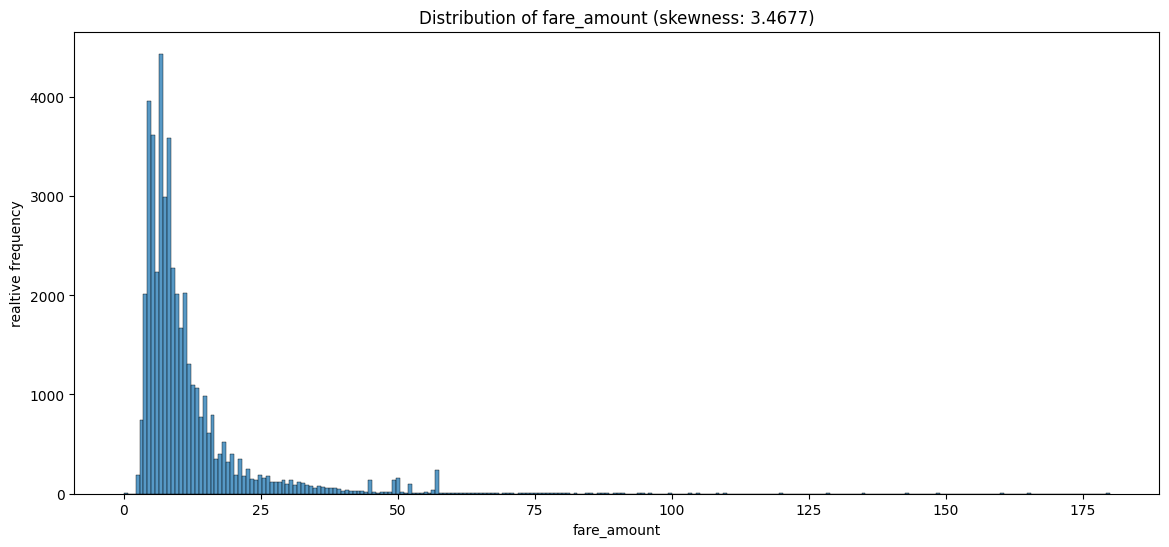

In [12]:
# Univariate - fare amount
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (14,6))
sns.histplot(sample_df['fare_amount'], bins = 250, ax = ax)
ax.set_title('Distribution of fare_amount (skewness: {:0.5})'.format(sample_df['fare_amount'].skew()))
ax.set_ylabel('realtive frequency')
plt.show()

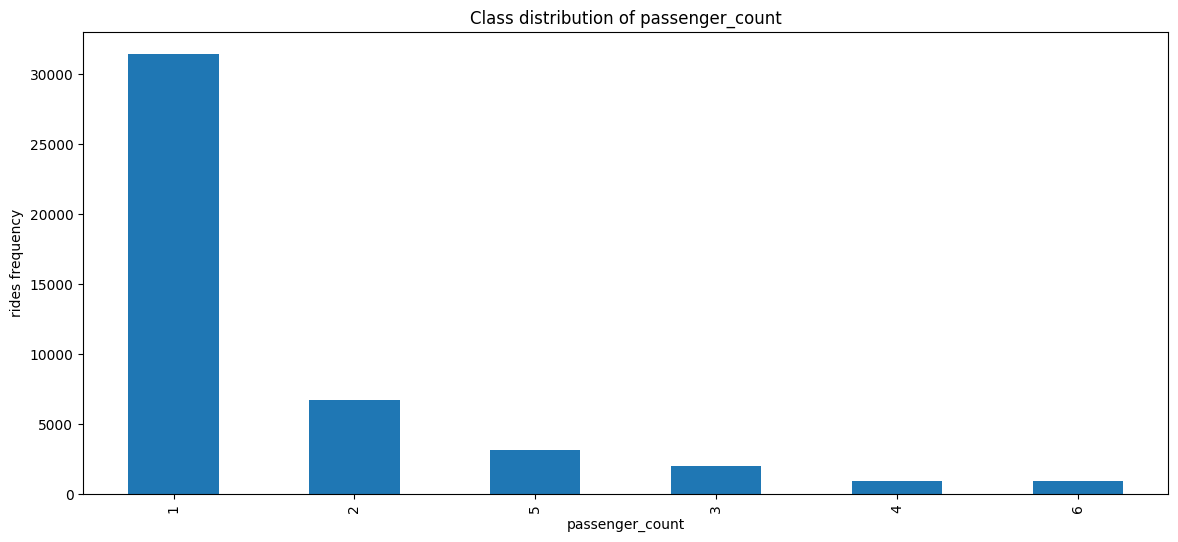

In [13]:
# Univariate - passenger_count
fig, ax = plt.subplots(figsize = (14,6))
class_dist = sample_df['passenger_count'].value_counts()
class_dist.plot(kind = 'bar', ax = ax)
ax.set_title('Class distribution of passenger_count')
ax.set_ylabel('rides frequency')
plt.show()

In [14]:
sample_df['fare_amount'].describe()

count    45000.000000
mean        11.363014
std          9.657713
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64

In [15]:
sample_fares_to_drop = sample_df[sample_df['fare_amount']>100].index
sample_df.drop(sample_fares_to_drop, axis = 0, inplace = True)
print('Shape of dataset after dropping fare_amount outliers :{}'.format(sample_df.shape))

Shape of dataset after dropping fare_amount outliers :(44986, 7)


In [16]:
# Check the 2.5 and 97.5 percentile of latitude and logitude coordinates
def percentile(coordinate):
    two_half = coordinate.quantile(0.25)
    ninty_seven_half = coordinate.quantile(0.975)
    print('2.5 and 97.5 percentile of {}: {:0.2f}, {:0.2f}'
          .format(coordinate.name, two_half, ninty_seven_half))
    
percentile(sample_df['pickup_latitude'])
percentile(sample_df['dropoff_latitude'])
percentile(sample_df['pickup_longitude'])
percentile(sample_df['dropoff_longitude']) 

2.5 and 97.5 percentile of pickup_latitude: 40.73, 40.80
2.5 and 97.5 percentile of dropoff_latitude: 40.73, 40.81
2.5 and 97.5 percentile of pickup_longitude: -73.99, -73.78
2.5 and 97.5 percentile of dropoff_longitude: -73.99, -73.78


In [17]:
# latitudes range between 40 to 42
sample_df = sample_df.loc[sample_df['pickup_latitude'].between(left = 40, right = 42), :]
sample_df = sample_df.loc[sample_df['dropoff_latitude'].between(left = 40, right = 42), :]

# longitudes range between -75 to -72
sample_df = sample_df.loc[sample_df['pickup_longitude'].between(left = -75, right = -72), :]
sample_df = sample_df.loc[sample_df['dropoff_longitude'].between(left = -75, right = -72), :]

print('Shape of data after dropping outliers from latitude and longitude: {}'.format(sample_df.shape))

Shape of data after dropping outliers from latitude and longitude: (44058, 7)


In [18]:
# great circle distance
import great_circle_calculator.great_circle_calculator as gcc

def great_circle_distance(pick_long, pick_lat, drop_long, drop_lat):
    # Radius of earth (m)
    R = 6371000
    
    # Convert decimal degrees to radians
    pick_long,pick_lat,drop_long,drop_lat = map(np.radians, [pick_long, pick_lat, drop_long, drop_lat])
    
    # Distance of longitude and latitude in radians
    dist_long = drop_long - pick_long
    dist_lat = drop_lat - pick_lat
    
    # Haversine implementation
    a = np.sin(dist_lat/2)**2 + np.cos(pick_lat) * np.cos(drop_lat) * np.sin(dist_long/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    dist_m = R*c # Distance in meters
    dist_km = dist_m / 1000 # Distance in km
    return dist_km

# new column: great_circle_distance
sample_df['great_circle_distance'] = great_circle_distance(
        sample_df['pickup_longitude'], 
        sample_df['pickup_latitude'], 
        sample_df['dropoff_longitude'],
        sample_df['dropoff_latitude']
    )

In [ ]:
import great_circle_calculator.great_circle_calculator as gcc

def great_circle_distance(pick_long, pick_lat, drop_long, drop_lat):

    loc1 = (pick_long, pick_lat)
    loc2 = (drop_long, drop_lat)
    
    distance = gcc.distance_between_points(
        loc1, 
        loc2, 
        unit='kilometers', 
        haversine=True)
    
    return distance

# new column: great_circle_distance
sample_df['great_circle_distance'] = great_circle_distance(
        sample_df['pickup_longitude'], 
        sample_df['pickup_latitude'], 
        sample_df['dropoff_longitude'],
        sample_df['dropoff_latitude']
    )

sample_df.head()

In [22]:
sample_df['pickup_year'] = sample_df['pickup_datetime'].dt.year
sample_df['pickup_month'] = sample_df['pickup_datetime'].dt.month
sample_df['pickup_dayofweek'] = sample_df['pickup_datetime'].dt.dayofweek
sample_df['pickup_hour'] = sample_df['pickup_datetime'].dt.hour

sample_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,great_circle_distance,pickup_year,pickup_month,pickup_dayofweek,pickup_hour
180,2.9,2009-01-09 21:54:00+00:00,-73.994312,40.752552,-73.992877,40.751953,5,0.138013,2009,1,4,21
35737,11.0,2013-07-26 22:02:00+00:00,-73.992267,40.724967,-73.964480,40.756167,1,4.185256,2013,7,4,22
23411,15.3,2012-01-12 19:30:54+00:00,-73.995573,40.733393,-73.964132,40.719223,1,3.082565,2012,1,3,19
24420,12.1,2012-02-24 15:11:00+00:00,-73.972460,40.781205,-73.992100,40.752645,1,3.580637,2012,2,4,15
1674,10.6,2009-03-20 22:29:56+00:00,-74.003362,40.731914,-73.989504,40.757677,1,3.093467,2009,3,4,22


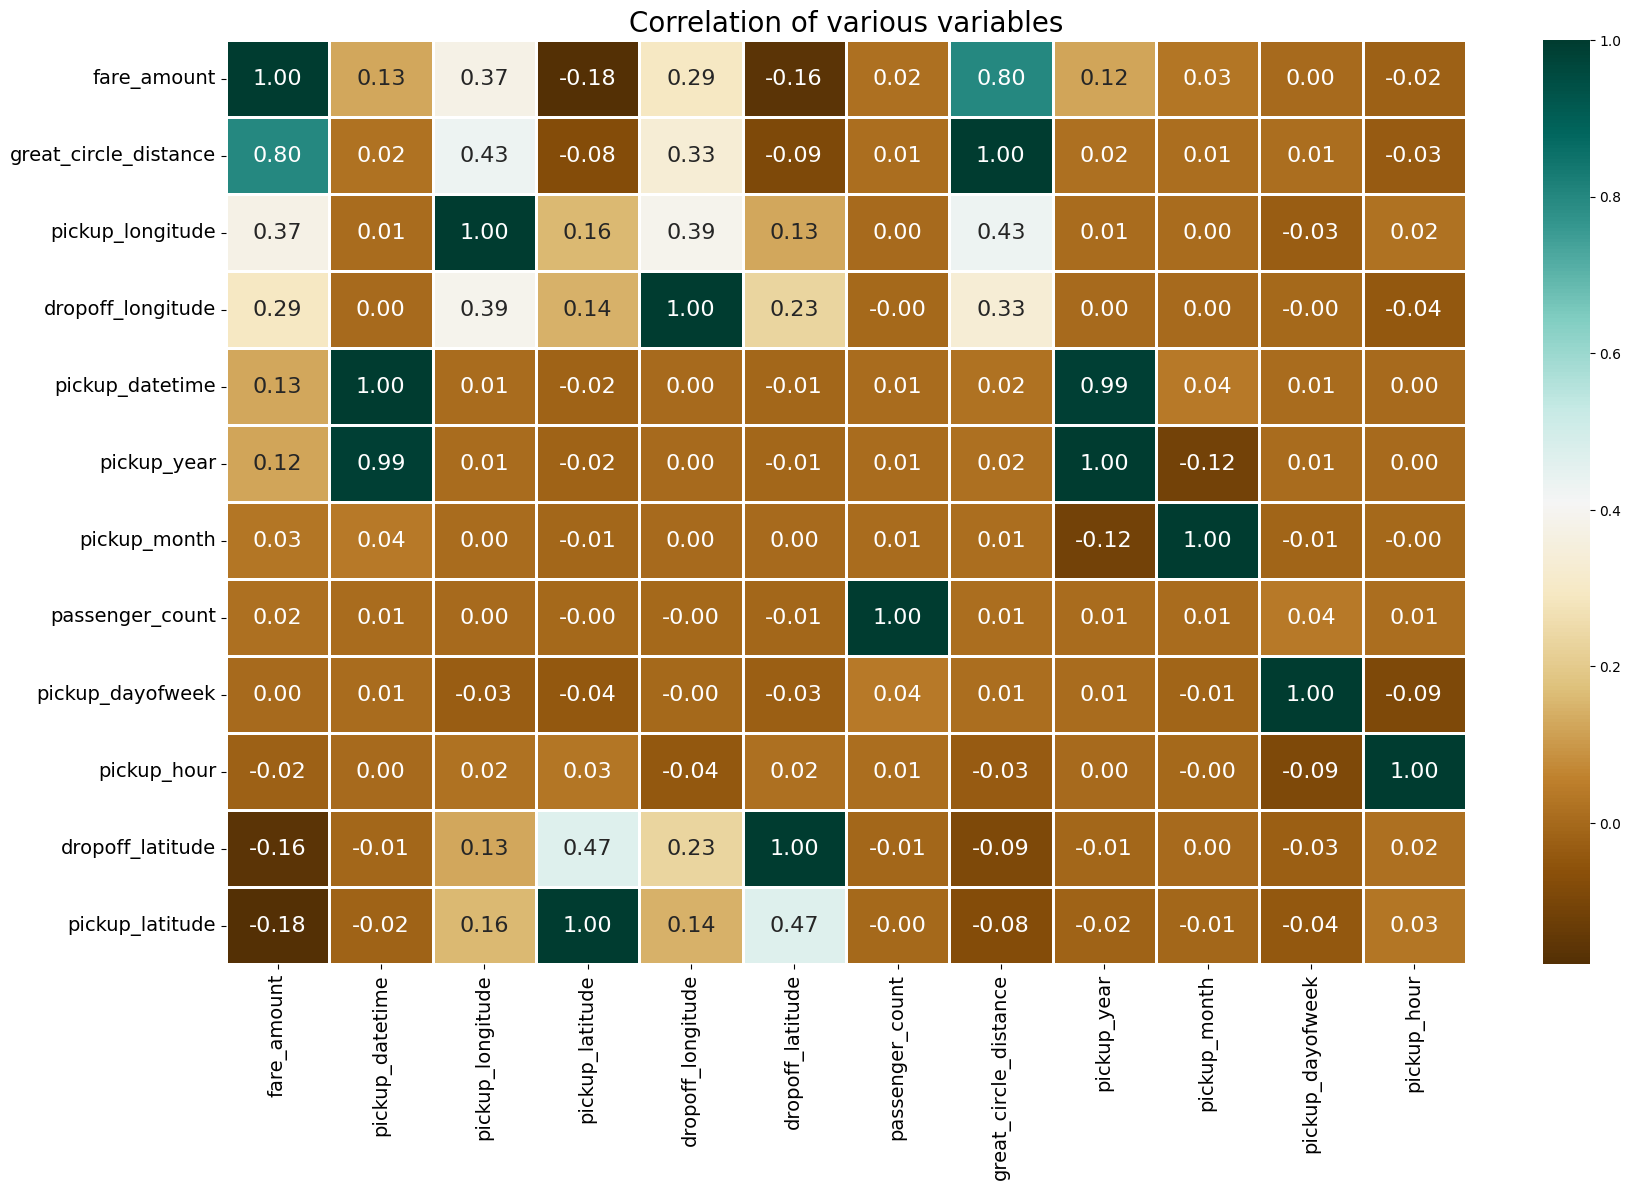

In [23]:
corr = sample_df.corr().sort_values(by='fare_amount', ascending=False)
fig, ax = plt.subplots(figsize = (20,12))
sns.heatmap(corr, annot = True, cmap ='BrBG', ax = ax, fmt='.2f', linewidths = 1, annot_kws = {'size': 16})
ax.tick_params(labelsize = 14)
ax.set_title('Correlation of various variables', fontsize = 20)
plt.show()

In [24]:
sample_df.dtypes

fare_amount                          float64
pickup_datetime          datetime64[ns, UTC]
pickup_longitude                     float64
pickup_latitude                      float64
dropoff_longitude                    float64
dropoff_latitude                     float64
passenger_count                        int64
great_circle_distance                float64
pickup_year                            int32
pickup_month                           int32
pickup_dayofweek                       int32
pickup_hour                            int32
dtype: object

In [ ]:
# Plot subplots of regression plots
import scipy.stats

continuous_var = sample_df.select_dtypes(include = ['float64']).drop('fare_amount', axis = 1)
fig, axes = plt.subplots(7,2, figsize = (30,60))
for ax, column in zip(axes.flatten(), continuous_var.columns):
    x = continuous_var[column]
    y = sample_df['fare_amount']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    sns.regplot(x = continuous_var[column], y = y, ax = ax, line_kws={'label':'r: {}\np: {}'.format(r_value,p_value)})
    ax.set_title('{} vs fare_amount'.format(column), fontsize = 32)
    fig.suptitle('Regression Plots', fontsize = 45)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
    ax.set_ylabel('fare_amount',fontsize=20)
    ax.set_xlabel(column, fontsize=20)
    ax.legend(loc = 'best', fontsize = 32)
fig.delaxes(ax = axes[6,1])
fig.tight_layout(rect = [0, 0.03, 1, 0.97])

Text(0.5, 1.0, 'pickup_hour vs fare_amount')

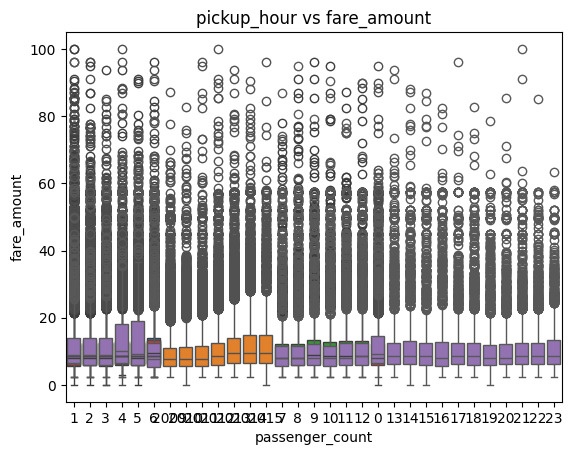

In [26]:
import seaborn as sns
sns.boxplot(data = sample_df, x = sample_df['passenger_count'], y = sample_df['fare_amount']).set_title('passenger_count vs fare_amount')
sns.boxplot(data = sample_df, x = sample_df['pickup_year'], y = sample_df['fare_amount']).set_title('pickup_year vs fare_amount')
sns.boxplot(data = sample_df, x = sample_df['pickup_month'], y = sample_df['fare_amount']).set_title('pickup_month vs fare_amount')
sns.boxplot(data = sample_df, x = sample_df['pickup_dayofweek'], y = sample_df['fare_amount']).set_title('pickup_dayofweek vs fare_amount')
sns.boxplot(data = sample_df, x = sample_df['pickup_hour'], y = sample_df['fare_amount']).set_title('pickup_hour vs fare_amount')

In [183]:
year_mean=sample_df.groupby(['pickup_year'])['fare_amount'].mean()
year_mean

pickup_year
2009     9.984894
2010    10.123259
2011    10.512879
2012    11.166323
2013    12.373357
2014    12.985068
2015    13.072556
Name: fare_amount, dtype: float64

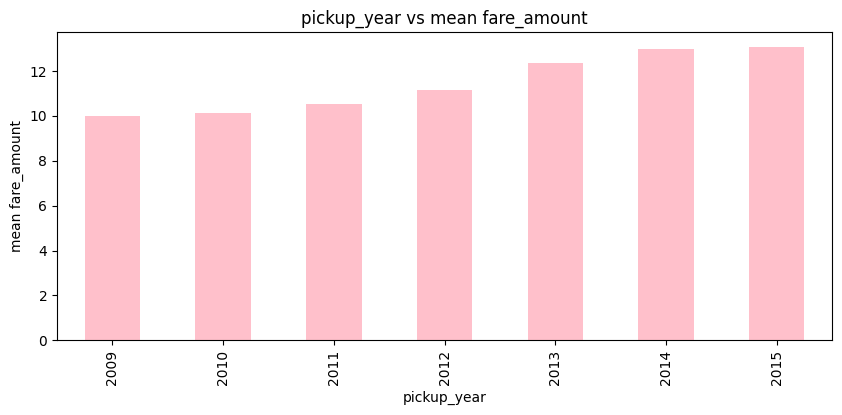

In [177]:
fig, ax = plt.subplots(figsize = (10,4))
year_mean.plot(kind = 'bar', legend = False, color = 'pink', ax = ax)
ax.set(title = 'pickup_year vs mean fare_amount', ylabel= 'mean fare_amount')
plt.show()

In [182]:
hour_mean=sample_df.groupby(['pickup_hour'])['fare_amount'].mean()
print(hour_mean)

val=np.sort(hour_mean)[::-1]
print(val[0:3])

pickup_hour
0     11.823580
1     11.605322
2     11.174346
3     11.588700
4     13.874934
5     15.344375
6     12.384548
7     10.924169
8     10.669632
9     10.592672
10    10.764826
11    11.002012
12    11.280850
13    11.681383
14    12.162445
15    12.025452
16    12.184203
17    11.311867
18    11.140800
19    10.693458
20    10.669072
21    10.978711
22    10.974607
23    11.284515
Name: fare_amount, dtype: float64
[15.344375   13.87493384 12.38454849]


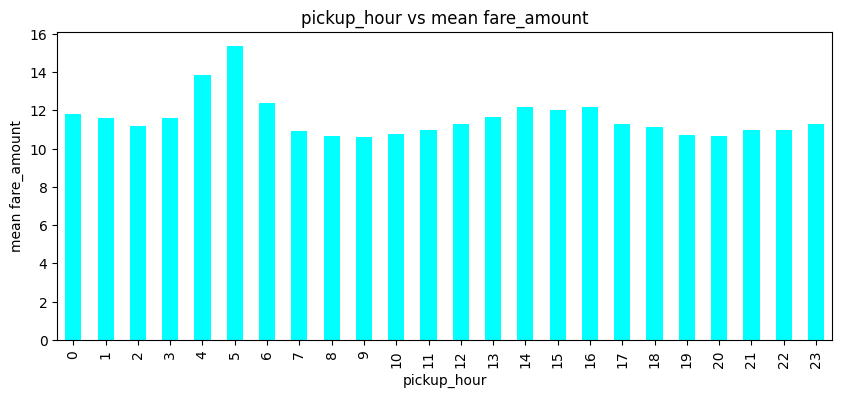

In [178]:
fig, ax = plt.subplots(figsize = (10,4))
hour_mean.plot(kind = 'bar', legend = False, color = 'cyan', ax = ax)
ax.set(title = 'pickup_hour vs mean fare_amount', ylabel= 'mean fare_amount')
plt.show()

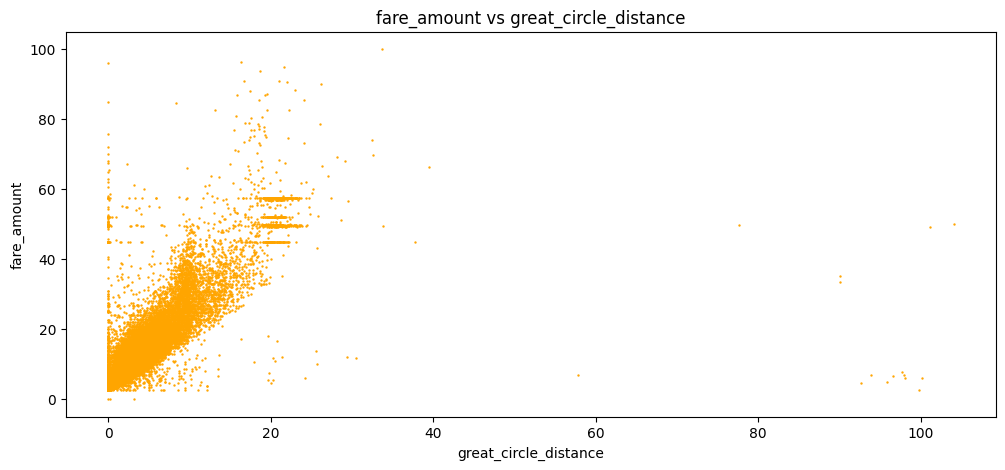

In [31]:
plt.figure(figsize=(12,5))
plt.scatter(x=sample_df['great_circle_distance'], y=sample_df['fare_amount'], s=0.5, color = 'orange')
plt.title("fare_amount vs great_circle_distance")
plt.xlabel("great_circle_distance")
plt.ylabel("fare_amount")
plt.show()

## Linear Regression

In [89]:
from sklearn.model_selection import train_test_split

X = sample_df[['great_circle_distance']]
y = sample_df[['fare_amount']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f'Size of X_train dataset: {X_train.shape}')
print(f'Size of y_train dataset: {y_train.shape}')
print(f'Size of X_test dataset: {X_test.shape}')
print(f'Size of y_test dataset: {y_test.shape}')

Size of X_train dataset: (30840, 1)
Size of y_train dataset: (30840, 1)
Size of X_test dataset: (13218, 1)
Size of y_test dataset: (13218, 1)


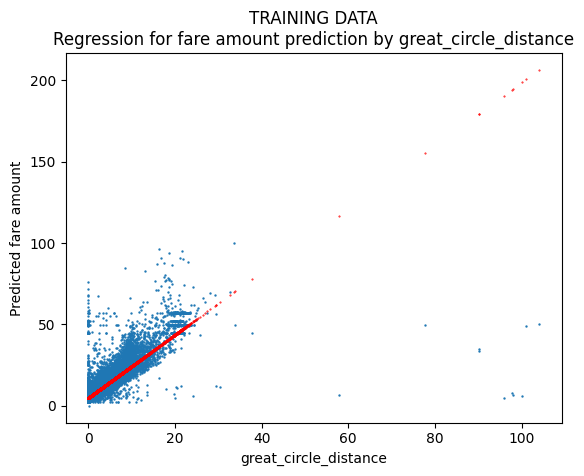

In [179]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

#Linear regression modeling
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

c=lr.intercept_
m=lr.coef_

y_pred_train = m*X_train+c
y_pred_train1=lr.predict(X_train)

import matplotlib as mpl #additional plotting functionality and parameters
mpl.rcParams['figure.dpi'] = 100

plt.scatter(X_train,y_train, s=0.5)
plt.scatter(X_train,y_pred_train1, s=0.2, color='red')
plt.xlabel('great_circle_distance')
plt.ylabel('Predicted fare amount')
plt.title('TRAINING DATA\nRegression for fare amount prediction by great_circle_distance')
plt.show()

In [94]:
# Errors
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE
mse = mean_squared_error(y_train, y_pred_train)

# MAE
mae = mean_absolute_error(y_train, y_pred_train)

print(mse, mae)


30.33786711108813 2.6549921529915244


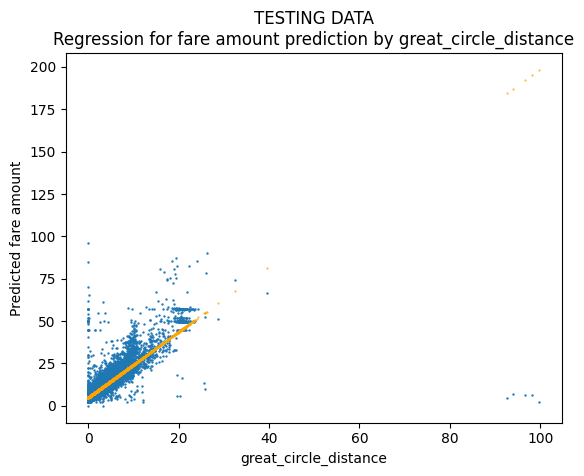

30.33786711108813 2.6549921529915244 5.507982126976097


In [95]:
y_pred_test=lr.predict(X_test)

import matplotlib as mpl #additional plotting functionality and parameters
mpl.rcParams['figure.dpi'] = 100

plt.scatter(X_test,y_test, s=0.5)
plt.scatter(X_test,y_pred_test, s=0.2, color='orange')
plt.xlabel('great_circle_distance')
plt.ylabel('Predicted fare amount')
plt.title('TESTING DATA\nRegression for fare amount prediction by great_circle_distance')
plt.show()

# Errors
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse1 = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mse1)
print(mse1, mae, rmse)

## Random Forest

In [ ]:
sample_df.columns
sample_df.drop(['fare_amount', 'pickup_datetime'], axis=1)
X_rf = sample_df['great_circle_distance'] # run for diagram


In [158]:
# Random Forest
X_rf = sample_df.drop(['fare_amount', 'pickup_datetime'], axis=1) # run for MSE MAE
y_rf = sample_df['fare_amount']
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=100)

print(f'Size of X_train dataset: {X_rf_train.shape}')
print(f'Size of y_train dataset: {y_rf_train.shape}')
print(f'Size of X_test dataset: {X_rf_test.shape}')
print(f'Size of y_test dataset: {y_rf_test.shape}')

Size of X_train dataset: (30840, 10)
Size of y_train dataset: (30840,)
Size of X_test dataset: (13218, 10)
Size of y_test dataset: (13218,)


In [159]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_rf_train, y_rf_train)
y_rf_pred = rf.predict(X_rf_train)

mse = mean_squared_error(y_rf_train, y_rf_pred)
mae = mean_absolute_error(y_rf_train, y_rf_pred)
print(mse, mae)

2.0061057714487673 0.7144224967574578


In [175]:
mpl.rcParams['figure.dpi'] = 100

X_val = np.arange(min(X_rf_train), max(X_rf_train), 0.01)
X_val = X_val.reshape((len(X_val), 1))

plt.scatter(X_rf_train, y_rf_train, s=0.5)
plt.scatter(X_rf_train,y_rf_pred, s=0.2, color='orange')
plt.ylabel('Predicted fare amount')
plt.title('TRAINING DATA\nRandom Forest Regression for fare amount prediction')
plt.show()

TypeError: arange() not supported for inputs with DType <class 'numpy.dtypes.StrDType'>.

In [176]:
from sklearn.ensemble import RandomForestRegressor 
rf_test = RandomForestRegressor(n_estimators=100)

rf_test.fit(X_rf_test, y_rf_test)
y_rf_test_pred = rf.predict(X_rf_test)

mse = mean_squared_error(y_rf_test, y_rf_test_pred)
mae = mean_absolute_error(y_rf_test, y_rf_test_pred)
print(mse, mae)

13.201434291345892 1.9255214026327736


In [174]:
X_val_test = np.arange(min(X_rf_test), max(X_rf_test), 0.01)
X_val_test = X_val_test.reshape((len(X_val), 1))

plt.scatter(X_rf_test, y_rf_test_pred, s=0.5)
# plt.scatter(X_rf_test,y_rf_test_pred, s=0.2, color='red')
plt.ylabel('Predicted fare amount')
plt.title('TRAINING DATA\nRandom Forest Regression for fare amount prediction')
plt.show()

TypeError: arange() not supported for inputs with DType <class 'numpy.dtypes.StrDType'>.